In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
eco_df = pd.read_excel("../Data/TEIS-NSS Project Data 10-2022.xlsx", sheet_name ='ECO with Exit21-22')

In [4]:
elig_df = pd.read_excel("../Data/TEIS-NSS Project Data 10-2022.xlsx", sheet_name ='Elig Timeline Rpt 2018-2022')

In [5]:
eco_df.head()

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,704.0,514.0,0.0
2,ET,510663.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,115.0,-44483.0,-44483.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
4,ET,506507.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,159.0,-44434.0,-44434.0


In [6]:
elig_df.head()

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw


In [7]:
eco_df = eco_df[(eco_df['OC1 Data Check'] == 1)]
eco_df = eco_df[(eco_df['OC2 Data Check'] == 1)]
eco_df = eco_df[(eco_df['OC3 Data Check'] == 1)]

In [8]:
eco_df.rename(columns={'CHILD_ID' : 'Child ID'}, inplace = True)

In [9]:
eco_df.head()

,DISTRICT,Child ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,704.0,514.0,0.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
5,ET,494216.0,2021-01-06,2.0,4.0,6.0,2021-06-30,4.0,5.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,288.0,175.0,0.0
6,ET,449725.0,2020-08-06,4.0,5.0,7.0,2021-04-21,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,444.0,348.0,90.0


In [57]:
combined_data = pd.merge(eco_df, elig_df,how = 'inner', on = 'Child ID')

In [58]:
combined_data.shape

(67610, 97)

In [59]:
combined_data['Exit Reason_y'] = combined_data['Exit Reason_y'].str.strip('618 -')

In [60]:
combined_data.dtypes

DISTRICT                         object
Child ID                        float64
ECO_Entry_DATE           datetime64[ns]
Ent SOCIAL_SCALE                float64
Ent KNOWLEDGE_SCALE             float64
                              ...      
Init. Elig. Decision             object
Init. Elig. Category             object
Init. Elig. Det. Date    datetime64[ns]
Exit Date_y              datetime64[ns]
Exit Reason_y                    object
Length: 97, dtype: object

In [63]:
combined_data = combined_data[(combined_data['OC1 Data Check'] == 1)]
combined_data = combined_data[(combined_data['OC2 Data Check'] == 1)]
combined_data = combined_data[(combined_data['OC3 Data Check'] == 1)]

In [64]:
combined_data = combined_data.replace(["Diagnosed Condition, Developmental Evaluation"],"Both")

In [65]:
combined_data.head()

,DISTRICT,Child ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date_y,Exit Reason_y
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,7.0,7.0,NaN,9.0,20.0,Eligible,Developmental Evaluation,2021-04-14,2021-11-15,Part B eligible
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,-1.0,7.0,0.0,8.0,15.0,Eligible,Developmental Evaluation,2020-03-20,2022-02-25,Completion of IFSP/ no longer requires services
2,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,0.0,NaN,NaN,1.0,14.0,Eligible,Developmental Evaluation,2019-01-16,2021-12-19,Part B eligible
3,ET,494216.0,2021-01-06,2.0,4.0,6.0,2021-06-30,4.0,5.0,7.0,...,1.0,8.0,0.0,0.0,9.0,Eligible,Developmental Evaluation,2020-12-17,2021-10-21,Parent withdraw
4,ET,449725.0,2020-08-06,4.0,5.0,7.0,2021-04-21,7.0,7.0,7.0,...,38.0,51.0,NaN,2.0,55.0,Eligible,Developmental Evaluation,2020-05-06,2021-07-26,Parent withdraw


In [66]:
dev_eval = combined_data[(combined_data['Init. Elig. Category'] == "Developmental Evaluation")]

In [67]:
diagnosed = combined_data[(combined_data['Init. Elig. Category'] == "Diagnosed Condition")]

In [74]:
diag_and_dev = combined_data[(combined_data['Init. Elig. Category'] == "Both")]

In [69]:
dev_eval['Exit Reason_y'].value_counts(dropna = False)

Part B eligible                                                   1318
Part B eligibility not determined                                 1182
Parent withdraw                                                    780
Not eligible for Part B – Exit with no referrals                   231
Not eligible for Part B – Exit with referral to other programs     227
Attempts to contact unsuccessful                                   185
Moved out of state                                                  93
Completion of IFSP/ no longer requires services                     38
NaN                                                                 16
Deceased                                                             4
Name: Exit Reason_y, dtype: int64

Text(0.5, 1.0, 'Exit Reasons for children with a developmental evaluation')

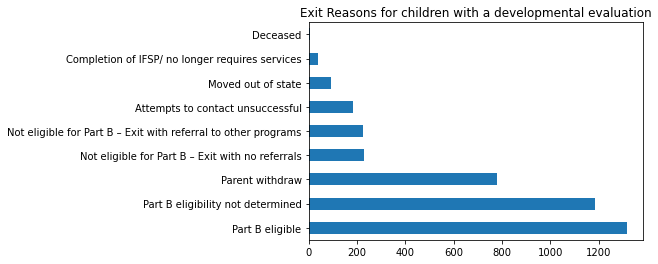

In [70]:
dev_eval['Exit Reason_y'].value_counts().plot(kind = 'barh')
plt.title("Exit Reasons for children with a developmental evaluation")

Text(0.5, 1.0, 'Exit Reasons for children with a diagnosed condition')

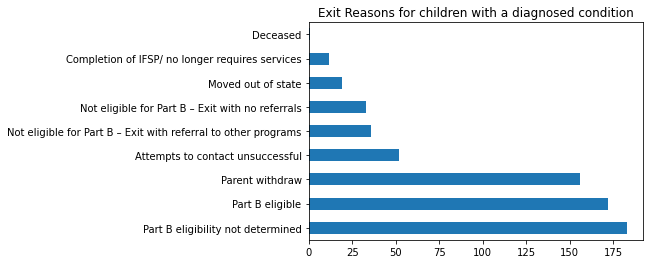

In [71]:
diagnosed['Exit Reason_y'].value_counts().plot(kind = 'barh')
plt.title("Exit Reasons for children with a diagnosed condition")

Text(0.5, 1.0, 'Exit Reasons for children with both an evaluation and diagnosis')

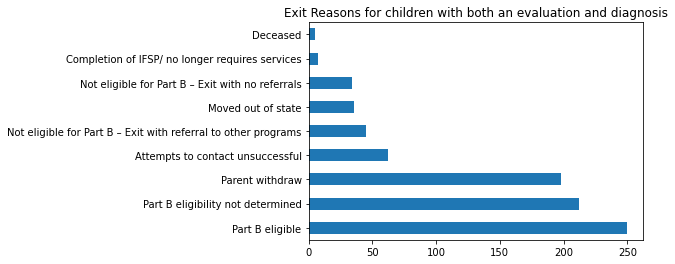

In [75]:
diag_and_dev['Exit Reason_y'].value_counts().plot(kind = 'barh')
plt.title("Exit Reasons for children with both an evaluation and diagnosis")

AttributeError: 'list' object has no attribute 'set'

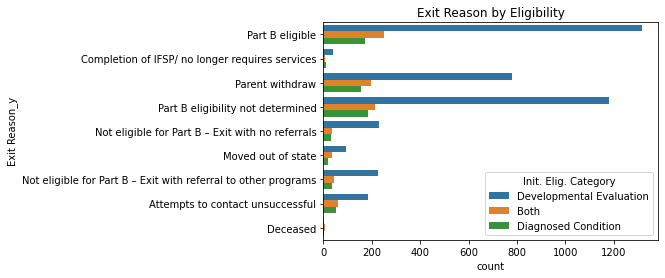

In [85]:
graph = sns.countplot(data= combined_data, y='Exit Reason_y', hue='Init. Elig. Category').set(title= "Exit Reason by Eligibility")
graph.set(ylabel= 'Exit Reason')
graph = plt.figure(figsize=(20,10))